# House Pricing

This project uses the kaggle dataset available at https://www.kaggle.com/datasets/shree1992/housedata?resource=download to predict the price of houses based on a given set of features using a Linear Regression model.

The project is divided in 5 main parts:
- **Dataset Characterization** - were we explore the dataset and observe its characteristics, like the size and the existing features
- **Data Preprocessing** - were we check the consistency of our data, feature engineer new variables from the existing ones and manage the categorical variables so that they can be used in the model
- **Exploratory Data Analysis** - were we do some visualizations to understand the prices distribution and also how some features correlate and influence the prices. A litle more data processing is done in this step to solve some issues that the visualizations allow us to find
- **Predictive Model** - were we built a Linear Regression Model to predict the Houses' prices using a K-Fold Cross-Validation Scheme and try different features combinations to create the best model possible with the existing data
- **Conclusion** - were we interpret the obtained results and do some considerations on how to improve the price prediction results




Project author: André Bernardes (https://www.linkedin.com/in/andrebernardes99/)

# Import Libraries and Load Files

In [1]:
# Import the google drive were the dataset is saved
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import the libraries used in the project
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load the dataset
csv_path = '/content/gdrive/MyDrive/Data Science Projects/HousePrices/data.csv'
df = pd.read_csv(csv_path)

# Dataset Characterization

In this section we look at the dataset to try to make sense of it. We observe wich columns it has, check the number of instances, and if we have values missing. We also compute basic stats of each column, and perform a correlation analysis to watch wich are the features more correlated to the price of an house.

Variables in study:

'date' - Date

'price' - Numeric

'bedrooms' - Numeric

'bathrooms' - Numeric

'sqft_living' - Numeric

'sqft_lot' - Numeric

'floors' - Numeric

'waterfront' - Categorical (Binary)

'view' - Numeric

'condition' - Numeric

'sqft_above' - Numeric

'sqft_basement' - Numeric

'yr_built' - Date (Year)

'yr_renovated' - Date (Year)

'street' - String

'city' - String

'statezip' - String

'country' - String

In [4]:
# Print the 5 first instances of the dataset to check if everything is ok
df.head(n=5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# Check the info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# The describe method give us simple stats of the numerical columns
df.describe() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
# As the goal of this project is to predict house prices,
# it is interesting to check the media and median prices of the dataset

print("The mean house price is", round(df['price'].mean(), 2), "$.")
print("The median house price is", round(df['price'].median(), 2), "$.")

The mean house price is 551962.99 $.
The median house price is 460943.46 $.


In [ ]:
# It is also interesting to check which are the variables more
# correlated to the house price

df.corr()['price'].sort_values(ascending=False) # Correlation between the numerical columns

<ipython-input-8-e1383de2f131>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=False) # Correlation between the numerical columns


price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

# Data Preprocessing

In this step we will check for empty cells (nulls), transform Categorical variables into dummies (if we see fit), and feature engineer new variables if possible (for instance the year trimester from the date).

In [6]:
# First let's count the nulls existing in each variable
df.isnull().sum() 

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

**Great!** We do not have null values.

If we had some null values, we could drop them (using **df.dropna()**), or we could preprocess the data to fill them (for instance using averages by groups).

In [7]:
# From now on we will work in the df_processed dataset so that we do not change
# the original dataset, in case we need it
df_processed = df

## Feature Engineer new variables

In the feature engineer step, we should think if we can engineer new features based on the current ones, that can be more descriminative for accomplish our goal (the price prediction).

In this case we can experiment to see if the trimester when the house is sold affects its price (due to the economy cyclicality).



In [8]:
# From the date variable we will extract the month when the house was sold

# First we will convert the date column from strings to DateTime objects
df_processed['date'] = pd.to_datetime(df_processed['date'])

# Get the month from the date and assign a new column to save this variable
df_processed['month'] = df_processed['date'].apply(lambda time: time.month)

In [9]:
# Define the function which gets the trimester from the month column
def get_trimester(month):
  if month>=1 and month<=3:
    return 'first_trimester'
  elif month>=4 and month<=6:
    return 'second_trimester'
  elif month>=7 and month<=9:
    return 'third_trimester'
  else:
    return 'fourth_trimester'

In [10]:
df_processed['trimester'] = df_processed['month'].apply(get_trimester)

## Manage Categorical Variables

At this point of study we have some categorical, string or date variables that we should take care before advancing.

Examples: 'date', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country', 'month' and 'trimester'.

- The 'date' variable was already processed into the 'month' variable used to get the 'trimester' variables.

- The 'waterfront' is already in the binary form, so it can be used in that way.

In [11]:
df_processed = df_processed.drop(columns='date', axis=0) # Drop the date column

- The variable 'condition' is a rate from 1 to 5. As it is a ranking, it can be used in the model as a numeric continuous variable.

In [12]:
conditions_unique = df_processed['condition'].unique()
np.sort(conditions_unique) 

array([1, 2, 3, 4, 5])

- The variables 'yr_built' and 'yr_renovated' are respectively the year the house was built and the year the house was renovated. In both cases we can expect that a more recent construction or renovation date should contribute to an increase in price. In this way, we can use both these variables as continuos numeric values, since a greater year number means that the construction or the renovation date is more recent.

- The 'street' variable has 4525 different unique values. This means that almost every house is in a different street, so it will not be a usefull variable in our model, we will just drop it.

In [13]:
print('We have',df_processed['street'].nunique(), 'different street values.')
df_processed = df_processed.drop(columns='street', axis=0) # Drop the street column

We have 4525 different street values.


- The 'city' variable has 44 different values. However the different values are not equally distributed, being arround 34% of the houses from Seattle. 

Here we could expand this categorical variable into multiple categorical features, called dummy variables (using pd.get_dummies), so it can be used in our model. However as the different values are not equally distributed, and some cities have just one instance or a very small percentage of instances it is not the ideal solution, because it can cause overfitting. 

Other option, as the Seattle city is the most prevalent value, is for instance feature engineer a new variable such as the house being in Seattle or not.

We will try the first option. In the step of feature selection it will be analysed which features should be used and it is probable that the dummy variables representing the cities with few instances will be disregarded.

In [14]:
print('We have',df_processed['city'].nunique(), 'different city values.')
print('\nThe percentage of instances by city is: \n')
round(df_processed.city.value_counts()/df_processed.shape[0]*100,2)

We have 44 different city values.

The percentage of instances by city is: 



Seattle                34.20
Renton                  6.37
Bellevue                6.22
Redmond                 5.11
Issaquah                4.07
Kirkland                4.07
Kent                    4.02
Auburn                  3.83
Sammamish               3.80
Federal Way             3.22
Shoreline               2.67
Woodinville             2.50
Maple Valley            2.09
Mercer Island           1.87
Burien                  1.61
Snoqualmie              1.54
Kenmore                 1.43
Des Moines              1.26
North Bend              1.09
Covington               0.93
Duvall                  0.91
Lake Forest Park        0.78
Bothell                 0.72
Newcastle               0.72
SeaTac                  0.63
Tukwila                 0.63
Vashon                  0.63
Enumclaw                0.61
Carnation               0.48
Normandy Park           0.39
Clyde Hill              0.24
Medina                  0.24
Fall City               0.24
Black Diamond           0.20
Ravensdale    

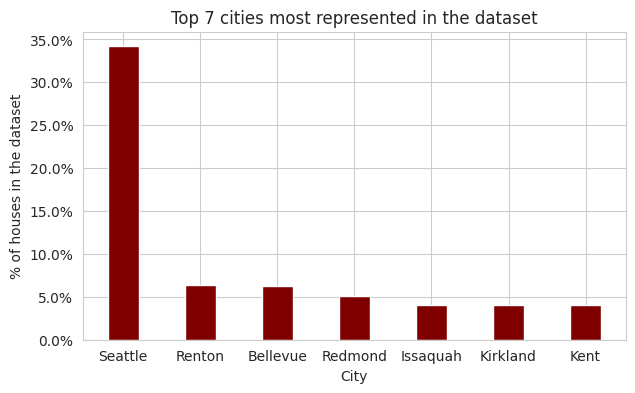

In [44]:
import matplotlib.ticker as mtick

# creating a illustrative bar plot
plt.rcParams['figure.figsize'] = [7, 4]
fig, ax = plt.subplots()
ax.bar(df.city.value_counts().index[0:7], df.city.value_counts().values[0:7]/df.shape[0]*100, 
        color ='maroon', width = 0.4)
 
ax.set_xlabel("City")
ax.set_ylabel("% of houses in the dataset")
ax.set_title("Top 7 cities most represented in the dataset")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [16]:
# Expand the city feature into dummy variables
df_processed = pd.get_dummies(df_processed,columns=['city'],drop_first=True)

- The 'statezip' variable has 77 different values. This variable has a similar logic as the one applied with the 'city' variable, so we will adopt the same strategy.

In [17]:
print('We have',df_processed['statezip'].nunique(), 'different statezip values.')
print('\nThe percentage of instances by statezip is: \n')
round(df_processed.statezip.value_counts()/df_processed.shape[0]*100,2)

We have 77 different statezip values.

The percentage of instances by statezip is: 



WA 98103    3.22
WA 98052    2.93
WA 98117    2.87
WA 98115    2.83
WA 98006    2.39
            ... 
WA 98047    0.13
WA 98288    0.07
WA 98050    0.04
WA 98354    0.04
WA 98068    0.02
Name: statezip, Length: 77, dtype: float64

In [18]:
# Expand the statezip feature into dummy variables
df_processed = pd.get_dummies(df_processed,columns=['statezip'],drop_first=True)

- Every house in this dataset is from the USA, so this information does not contribute to an increase in the performance of our model, we will drop the country column.

In [19]:
print('We have',df_processed['country'].nunique(), 'different country values.')
df_processed = df_processed.drop(columns='country', axis=0) # Drop the country column

We have 1 different country values.


- The month variable has 3 unique values, while the trimester has 2 unique values. We will test the hypothesis that the month and the trimester when the house was sold impacts the house price. 

In [20]:
print('We have',df['month'].nunique(), 'different month values.')
print('We have',df['trimester'].nunique(), 'different trimester values.')

We have 3 different month values.
We have 2 different trimester values.


In [21]:
# Use the pd.get_dummies() method to transform the month variable into
# a set of binary variables

df_processed = pd.get_dummies(df_processed,columns=['month'],drop_first=True)

In [22]:
# Use the pd.get_dummies() method to transform the trimester variable into
# a set of binary variables (will be just one as we only have 2 unique trimester values)

df_processed = pd.get_dummies(df_processed,columns=['trimester'],drop_first=True)

The Dataset that we will use to build the model will have the following variables:

In [23]:
for i in df_processed.columns:
  print(i)

price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
sqft_above
sqft_basement
yr_built
yr_renovated
city_Auburn
city_Beaux Arts Village
city_Bellevue
city_Black Diamond
city_Bothell
city_Burien
city_Carnation
city_Clyde Hill
city_Covington
city_Des Moines
city_Duvall
city_Enumclaw
city_Fall City
city_Federal Way
city_Inglewood-Finn Hill
city_Issaquah
city_Kenmore
city_Kent
city_Kirkland
city_Lake Forest Park
city_Maple Valley
city_Medina
city_Mercer Island
city_Milton
city_Newcastle
city_Normandy Park
city_North Bend
city_Pacific
city_Preston
city_Ravensdale
city_Redmond
city_Renton
city_Sammamish
city_SeaTac
city_Seattle
city_Shoreline
city_Skykomish
city_Snoqualmie
city_Snoqualmie Pass
city_Tukwila
city_Vashon
city_Woodinville
city_Yarrow Point
statezip_WA 98002
statezip_WA 98003
statezip_WA 98004
statezip_WA 98005
statezip_WA 98006
statezip_WA 98007
statezip_WA 98008
statezip_WA 98010
statezip_WA 98011
statezip_WA 98014
statezip_WA 98019
statezip_WA 98022
s

In [24]:
df_processed.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,month_6,month_7,trimester_third_trimester
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In the Exploratory Data Analysis section we will check the prices distribution and we will also review the features more correlated to the price and visualize some of them.

## Prices Distribution

Through a price distribution analysis it is possible to identify the presence of outliers. This can cause our model performance to decrease, we can opt by doing a model in a limited range of prices.

Text(0.5, 1.0, 'Boxplot')

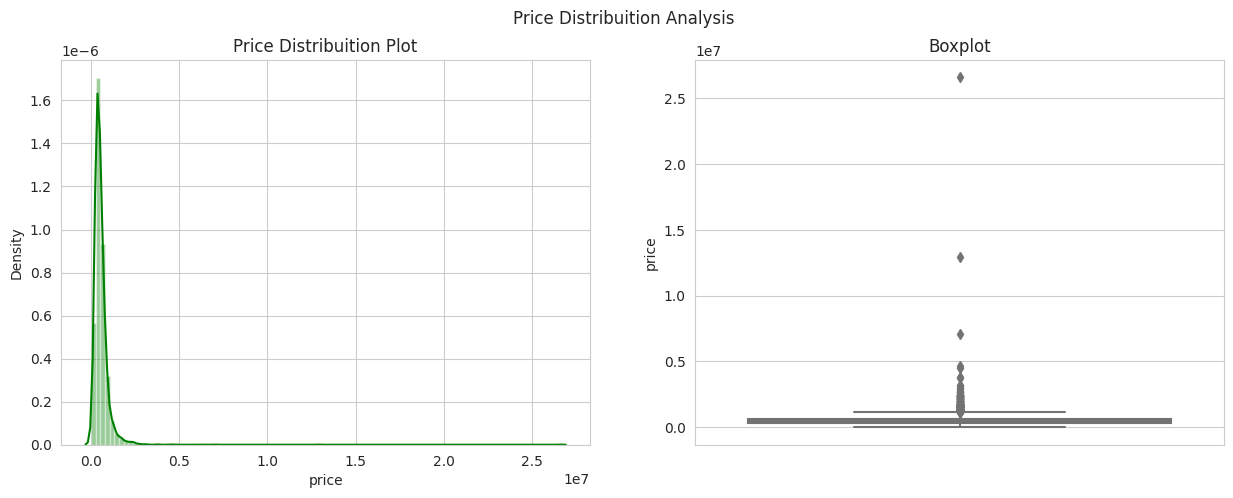

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Price Distribuition Analysis')

# Histogram Distribution
sns.distplot(df_processed['price'], ax=axes[0], bins=100, color='green') # histplot()
axes[0].set_title('Price Distribuition Plot')

# Boxplot
sns.boxplot(data=df_processed, ax=axes[1], y='price',palette='rainbow')
axes[1].set_title("Boxplot")

It is not possible to have houses priced with 0$, these rows should be deleted.
It is also visible the existence of some outliers.

### Remove outliers

In [ ]:
# Check the lowest price values
df_processed['price'].sort_values()

4472           0.0
4542           0.0
4481           0.0
4408           0.0
4411           0.0
           ...    
2761     4489000.0
2654     4668000.0
2286     7062500.0
4346    12899000.0
4350    26590000.0
Name: price, Length: 4600, dtype: float64

In [25]:
cost_zero_houses = df_processed[df_processed['price']==0]['price'].count()
print("We have", cost_zero_houses, "houses marked with a price of 0$.")

We have 49 houses marked with a price of 0$.


In [26]:
# Drop the instances were the house price is 0$
df_processed.drop(df_processed[df_processed['price']==0].index, inplace = True)

In [27]:
# Check price values equal to zero eliminated
new_cost_zero_houses = df_processed[df_processed['price']==0]['price'].count()
print("We have now", new_cost_zero_houses, "houses marked with a price of 0$.")

We have now 0 houses marked with a price of 0$.


In [28]:
# Compute the percentage of houses above 2M $
prices_list_np = df_processed[df_processed['price']>=2000000]['price'].to_numpy()
print("The dataset contains", len(prices_list_np), "houses above 2M $, which amounts to",
      round(len(prices_list_np)*100/df_processed.shape[0],2), "% of the dataset.")

The dataset contains 49 houses above 2M $, which amounts to 1.08 % of the dataset.


Only 49 houses in our dataset cost more than 
2M \$ (about 1.08\%). To reduce the impact of outliers we will remove the rows corresponding to the houses priced above 2M \$. In this way we will obtain a model specific to houses bellow 2M $ and hopefully obtain better performance for pricing houses in this price range.

In [29]:
# Remove the houses priced above 2M $ and check the now 5 most expensive houses in the dataset
df_processed.drop(df_processed[df_processed['price'] >= 2000000].index, inplace = True)
df_processed['price'].sort_values(ascending=False).head(5)

3496    1990000.0
1500    1970000.0
1690    1965221.0
2917    1950000.0
3661    1925000.0
Name: price, dtype: float64

We should now check again the price distribution.
It is possible to observe that it **looks much better**! We could go even further and remove for instance the prices above 1.5M $, but it will also be an arbitrary choice and sometimes we should not process too much our data to prevent overfitting and reduce the generalization power of the model.

Text(0.5, 1.0, 'Boxplot')

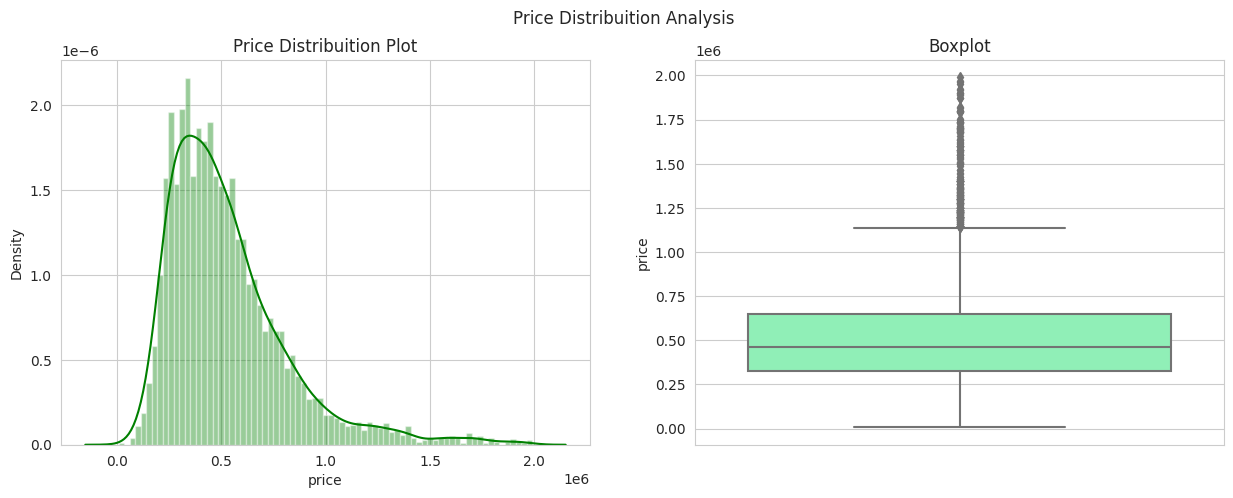

In [30]:
import warnings
warnings.filterwarnings('ignore')

# Check again the dataset distribution
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Price Distribuition Analysis')

# Histogram Distribution
sns.distplot(df_processed['price'], ax=axes[0], bins=75, color='green') # histplot()
axes[0].set_title('Price Distribuition Plot')

# Boxplot
sns.boxplot(data=df_processed, ax=axes[1], y='price',palette='rainbow')
axes[1].set_title("Boxplot")

## Visualize Features influence in price

In this step we can plot some of the features against the price, so that we can observe its influence in the price variation.

In [31]:
# We use the absolute correlation because for ML models, having negative or positive correlation
# is just as good for prediction purposes. Negative correlation means that when a variable decreases
# the other increases, while positive correlation means both increase.

abs(df_processed.corr()['price']).sort_values(ascending=False) # Correlation between the numerical columns


price                   1.000000
sqft_living             0.674316
sqft_above              0.574424
bathrooms               0.512479
view                    0.338243
                          ...   
city_Ravensdale         0.001867
statezip_WA 98136       0.001644
month_6                 0.000466
statezip_WA 98068       0.000141
city_Snoqualmie Pass    0.000141
Name: price, Length: 135, dtype: float64

### Squared Living Area

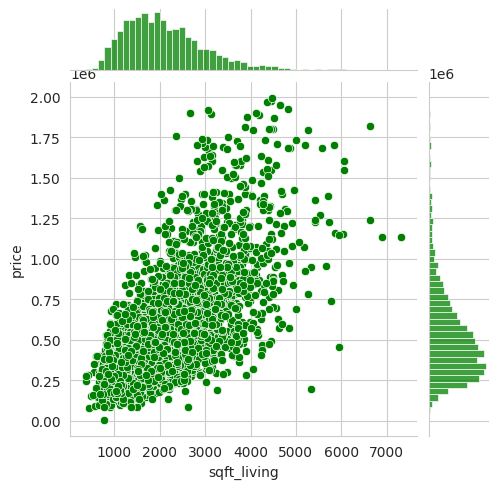

In [ ]:
sns.jointplot(x='sqft_living',y='price',data=df_processed,kind='scatter', color='green', height=5)

### Squared Above Area

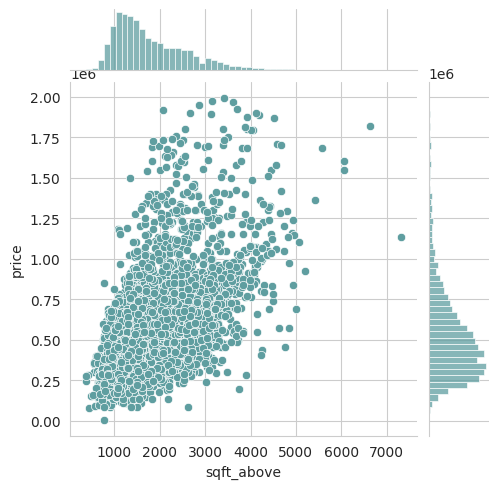

In [ ]:
sns.jointplot(x='sqft_above',y='price',data=df_processed,kind='scatter', color='cadetblue', height=5)

### Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

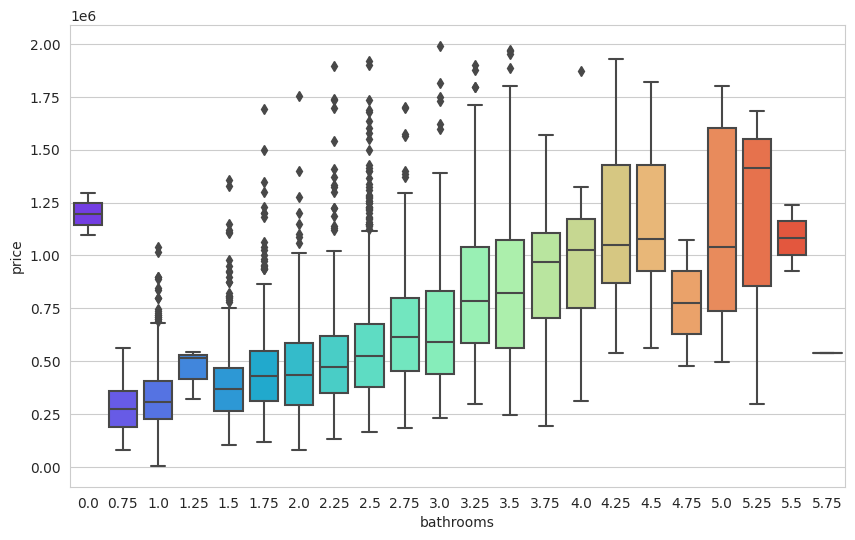

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_processed, x='bathrooms', y='price', palette='rainbow')

The variable Bathrooms seems to stand by the number of bathrooms in the house. However it presents decimal points, if it is the number of bathrooms in the house it should be an integer. We can assume that it is a mistake and round the number to the closest integer.

In [33]:
# Get the bathrooms variable and turn it into integers
df_processed['bathrooms'] = df_processed['bathrooms'].apply(lambda n: round(n+0.001))

<Axes: xlabel='bathrooms', ylabel='price'>

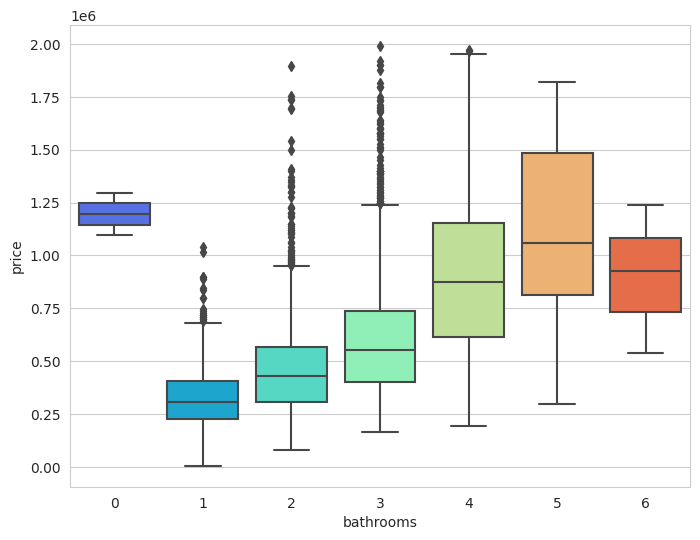

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_processed, x='bathrooms', y='price', palette='rainbow')

### View

<Axes: xlabel='view', ylabel='price'>

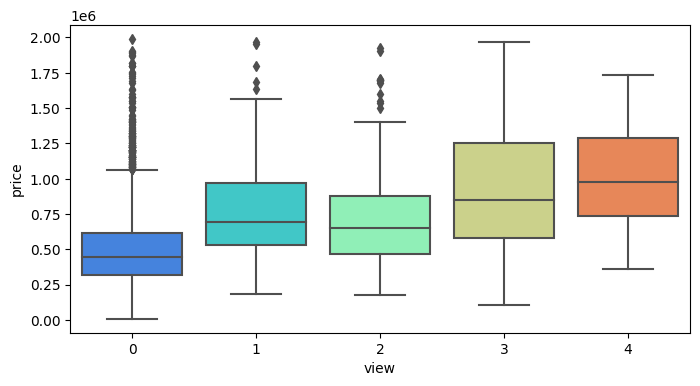

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_processed, x='view', y='price', palette='rainbow')

### Bedrooms

<Axes: xlabel='bedrooms', ylabel='price'>

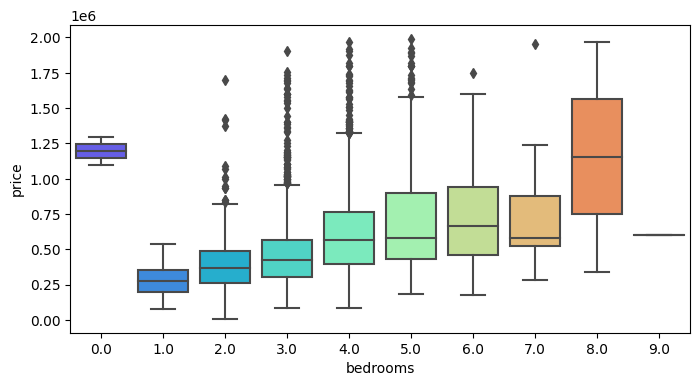

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_processed, x='bedrooms', y='price', palette='rainbow')

### City

In [35]:
# Check the mean house prices by city in the dataset that will be used
mean_prices_by_city = df[df['price'] < 2000000].groupby(['city'])[['price']].mean(). \
                      sort_values(["price"], ascending=[False])
mean_prices_by_city.head(5)

,price
city,
Medina,1.308600e+06
Yarrow Point,1.194838e+06
Mercer Island,9.849792e+05
Clyde Hill,9.268222e+05
Bellevue,7.818064e+05


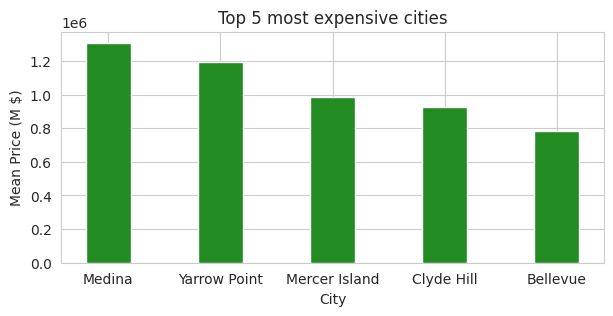

In [49]:
x = mean_prices_by_city[0:5].index
y = mean_prices_by_city['price'][0:5].values

# creating a illustrative bar plot
plt.rcParams['figure.figsize'] = [7, 3]
fig, ax = plt.subplots()
ax.bar(x, y, color ='forestgreen', width = 0.4)
 
ax.set_xlabel("City")
ax.set_ylabel("Mean Price (M $)")
ax.set_title("Top 5 most expensive cities")

plt.show()

# Save Processed Dataset

Let's save the processed dataset that is ready for the ML part of the project, so that if we need to come back here we don't need to run all the data processing part again.

In [37]:
# Save the dataset processed 
csv_path = '/content/gdrive/MyDrive/Data Science Projects/HousePrices/data_processed.csv'
df_processed.to_csv(csv_path, index=False)

In [50]:
# Load the dataset processed
csv_path = '/content/gdrive/MyDrive/Data Science Projects/HousePrices/data_processed.csv'
df_processed = pd.read_csv(csv_path)
df_processed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,month_6,month_7,trimester_third_trimester
0,313000.0,3.0,2,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,342000.0,3.0,2,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
2,420000.0,3.0,2,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
3,550000.0,4.0,3,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
4,490000.0,2.0,1,880,6380,1.0,0,0,3,880,...,0,0,0,0,0,0,0,0,0,0


# Predictive Model

In this section we will use the processed dataset to train and test our predictive model using a Linear Regression model in a K-Fold Cross-Validation scheme, and see if we are capable of predicting the house prices based on the existing features.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statistics

In [58]:
# Function to select the top n features based on the correlation to target (house prices)
def select_features(data, n_selected, target):
  corr_list = abs(data.corr()[target]).sort_values(ascending=False) # Correlation between the numerical columns
  return corr_list.index[1:(n_selected+1)], corr_list.values[1:(n_selected+1)]

## K-Fold Cross-Validation

In [59]:
# The k_fold_cross_validation(df, target, k, n_features) function performs a K-Fold Cross-Validation Scheme 
# and evaluates the model performance. 
# df is the dataset, target is the target column, k is the number of folds,
# n_features is the number of features that will be selected

def k_fold_cross_validation(df, target, k, n_features):
  # Lists to save the performance metrics
  mae_list = []
  mse_list = []
  rmse_list = []
  r2_score_list = []

  # List to save the features used at each iteration
  features_used = []
  features_corr = []
  features_coef = []

  # Number of instances by fold
  n_rows = df.shape[0]
  n_instances = round(n_rows/k)

  # Iterating by the k folds
  for i in range(0, k):

    # start and end points of the Test data
    start = i*n_instances
    end = i*n_instances + n_instances-1
    if i == (k-1):
      end = n_rows # Last fold can have different number of rows if n_rows not be multiple of n_instances

    # Train data
    df_train = df.drop(df.iloc[start:end].index) # Select all rows except the test data

    # Test data
    df_test = df.iloc[start:end] # Select the test data

    # Features Selection 
    selected_features, selected_features_corr = select_features(df_train, n_features, target)
    
    # X and y definition
    X_train = df_train[selected_features] # Features
    y_train = df_train[target] # Target  
    X_test = df_test[selected_features] # Features
    y_test = df_test[target] # Target

    # Create and train the model
    lm = LinearRegression() # Instance of the Linear Regression model
    lm.fit(X_train,y_train) # Train the model

    # Test the model in new data
    predictions = lm.predict(X_test)

    # Evaluate the model
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    r2_score = metrics.r2_score(y_test, predictions)

    # Save the performance metrics
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_score_list.append(r2_score)

    # Save the Features used
    features_used.append(selected_features)
    features_corr.append(selected_features_corr)
    features_coef.append(lm.coef_)

  # Structure the results
  model_results = {
                    "n_features": n_features,
                    "features_used": features_used,
                    "features_coef": features_coef,
                    "features_corr": features_corr,
                    "mae_list": mae_list,
                    "mse_list": mse_list,
                    "rmse_list": rmse_list,
                    "r2_score_list": r2_score_list
                  }
  return model_results

In [60]:
# Test using different number of features to create the model
models_tested = []
n_features = len(df_processed.drop(columns=['price'], axis=0).columns)
for i in range(1,n_features):
  model_results = k_fold_cross_validation(df_processed, 'price', 5, i)
  models_tested.append(model_results)

## Select the Optimal Model

We selected the R Square metric to compare the performances between the models tested. R Square measures how much of the variation in the dependent variable the model can account for.

In [ ]:
# Check the results for the models using different number of features
n_features_list = []
r2_mean_list = []
r2_stdev_list = []

for model_results in models_tested:
  print('\n--------------------------------------------------\n')
  print("Number of features: ", model_results["n_features"])
  print("R^2 mean (test): ", statistics.mean(model_results["r2_score_list"]))
  print("R^2 standard deviation (test): ", statistics.pstdev(model_results["r2_score_list"]))

  n_features_list.append(model_results["n_features"])
  r2_mean_list.append(statistics.mean(model_results["r2_score_list"]))
  r2_stdev_list.append(statistics.pstdev(model_results["r2_score_list"]))

# The performance goes quickly down from the use of 128 features to the use of 129, 
# probably because of the inclusion of some features that produce overfitting
# which can be for instance the cities that had just one instance

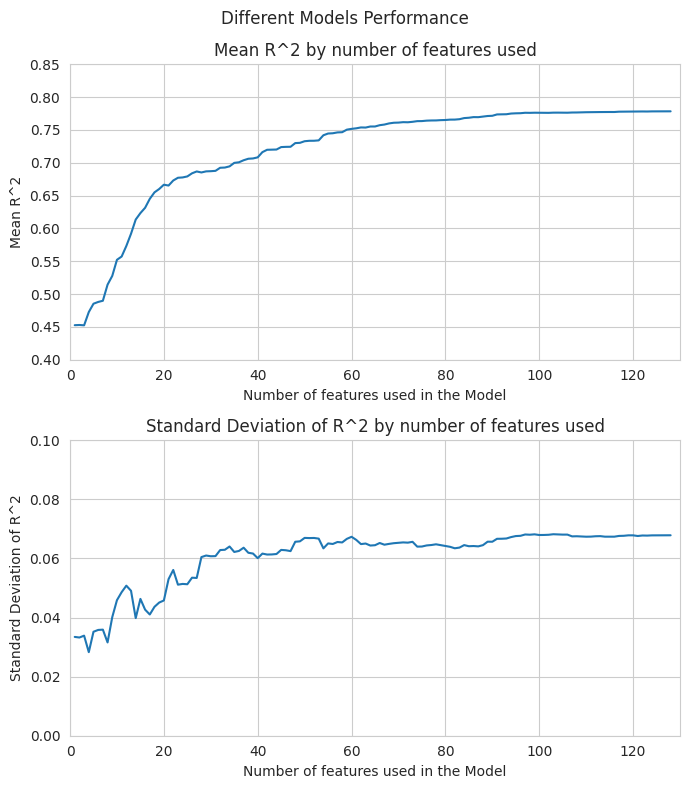

In [72]:
# It is easier to analyse data in a visual format, in this way we will plot the results
# obtained from using 1 to 128 features to train the model

plt.rcParams['figure.figsize'] = [7, 8]
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Different Models Performance')

ax1.plot(n_features_list[0:128], r2_mean_list[0:128])
ax1.set_xlabel("Number of features used in the Model")
ax1.set_ylabel("Mean R^2")
ax1.set_title("Mean R^2 by number of features used")
ax1.set_xlim((0,130))
ax1.set_ylim((0.4,0.85))
#ax1.grid()

ax2.plot(n_features_list[0:128], r2_stdev_list[0:128])
ax2.set_xlabel("Number of features used in the Model")
ax2.set_ylabel("Standard Deviation of R^2")
ax2.set_title("Standard Deviation of R^2 by number of features used")
ax2.set_xlim((0,130))
ax2.set_ylim((0,0.10))
#ax2.grid()

# Show the plot
fig.tight_layout()
plt.show()

- The performance of the models increases with the increment on the number of features used to train the model until the use of arround 100 features. After that point the improvment in the performance is much slower. However the standard deviation of the results decreases a litle bit from the use of 100 to the use of 120 features. 

- It is important to have a model with the best performance possible but also with the less standard deviation possible, so that we can rely on the model predictions. This way we will select the model trained with 120 features to be our final model.

In [67]:
# Selected Model Performance
n_features = len(df_processed.drop(columns=['price'], axis=0).columns)
model_results = k_fold_cross_validation(df_processed, 'price', 5, 120)

print("Selected Model Performance (n_features=120):")

print("\nR^2 mean (test): ", round(statistics.mean(model_results["r2_score_list"]), 2))
print("R^2 standard deviation (test): ", round(statistics.pstdev(model_results["r2_score_list"]),2))

print("\nMAE mean (test): ", round(statistics.mean(model_results["mae_list"]), 2))
print("MAE standard deviation (test): ", round(statistics.pstdev(model_results["mae_list"]),2))

Selected Model Performance (n_features=120):

R^2 mean (test):  0.78
R^2 standard deviation (test):  0.07

MAE mean (test):  87607.76
MAE standard deviation (test):  9626.96


## Features Impact Analysis

In [69]:
# Features impact analysis of the model with the optimal number of features
features = []
for i in range(len(model_results["features_used"])):
  for j in range(len(model_results["features_used"][i])):
    feature = {
                  "Feature": model_results["features_used"][i][j],
                  "Abs_Corr": model_results["features_corr"][i][j],
                  "Coefficient": model_results["features_coef"][i][j]
                }
    features.append(feature)

# Dataset were each instance is a feature used in a K-fold CV iteration
features_df = pd.DataFrame(features)

# Number of times the feature was selected
features_df['Occur'] = features_df['Feature'].apply(lambda x: (features_df['Feature'] == x).sum())

# Mean feature absolute correlation, Mean feature coefficient and Occurrances
features_impact_df = features_df.groupby(['Feature']).mean().sort_values(["Occur", "Abs_Corr"], ascending=[False, False])
#features_impact_df.iloc[0:120]
features_impact_df

,Abs_Corr,Coefficient,Occur
Feature,,,
sqft_living,0.674632,108.306804,5.0
sqft_above,0.574647,96.513030,5.0
bathrooms,0.473501,18293.933498,5.0
view,0.338660,60720.736376,5.0
bedrooms,0.334391,-14579.358741,5.0
...,...,...,...
city_Snoqualmie,0.011283,-6766.356848,4.0
city_Normandy Park,0.013375,271656.180861,3.0
statezip_WA 98065,0.011605,-11857.251854,3.0


# Conclusions

- In conclusion, we developed a model using 120 features capable of explaining 78% of the variation in the houses' prices with a 7% standard deviation. The model had a Mean Absolute Error of 87607.76 in the predictions, which means that in average it was wrong in 87607.76 in each prediction .

- The most correlated feature to the house price is the 'sqft_living'. In our final model this feature had a coefficient of 108.3, which means that by every extra square foot of living space, the House is in averages 108.3 $ more expensive.

- To further improve our results we could try to feature engineer new features from the existing ones or try to find new features that can help to explain the prices variation. A larger dataset would also help, since it would allow our model a finer tune.

- Another approuch could be used to solve this question and try to improve the prediction performance, like the use of deep learning (neural networks). However in that way we would lose some of the model interpretability.
